In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [3]:
df = pd.read_csv("Housing_encoded.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [4]:
x=df.drop('price',axis=1)
y=df['price']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression()
print(evaluate_model(poly_model, x_train_poly, x_test_poly, y_train, y_test))

{'MAE': 986773.9517421584, 'MSE': 1731965726148.4382, 'R2 Score': 0.5978150518869552}


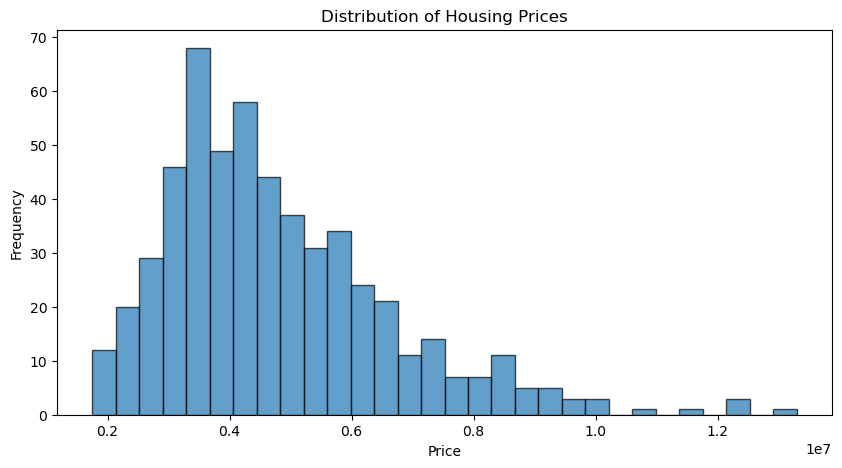

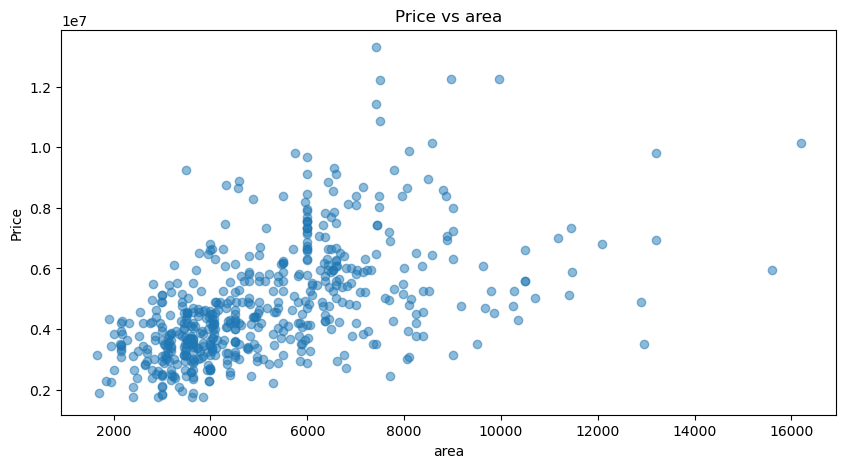

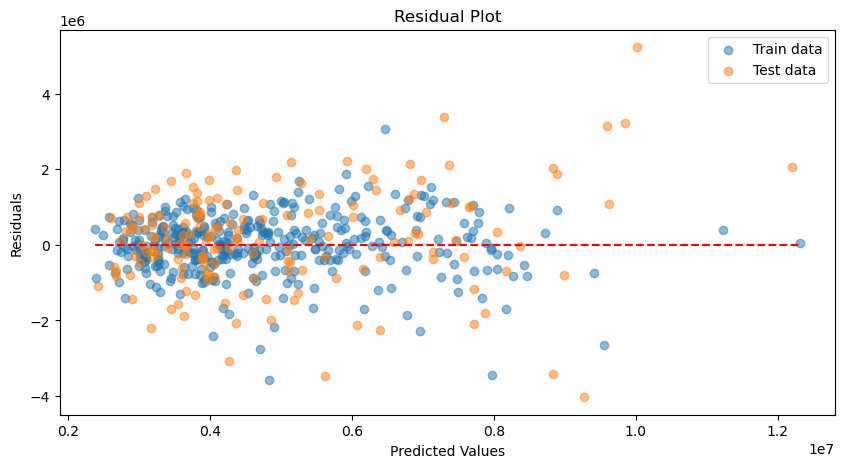

In [9]:
# Histogram of the target variable
plt.figure(figsize=(10, 5))
plt.hist(y, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of price vs one of the features (e.g., 'feature1')
plt.figure(figsize=(10, 5))
plt.scatter(x['area'], y, alpha=0.5)
plt.title('Price vs area')
plt.xlabel('area')
plt.ylabel('Price')
plt.show()

# Residual plot
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred - y_train, alpha=0.5, label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, alpha=0.5, label='Test data')
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='r', linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()